# Imports

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

## Load functions

In [2]:
%run ./functions.py

## Test forceatpoint function

In [3]:
dirvec = np.array([-1,0,0])
x = 0.003;y = 0.018;z = 0.0;
fx,fy,fz = forceatpointconnector(2,x,y,z,dirvec)
display("fx",fx)
display("fy",fy)
display("fz",fz)

'fx'

58.843430664513868

'fy'

-0.0085702238361573535

'fz'

0.0

## Connector field
Draw connector field just in case some wants to see it.

The connector is represented by four magnets at their 3D printed holders with orientation i=1,j=0,k=0

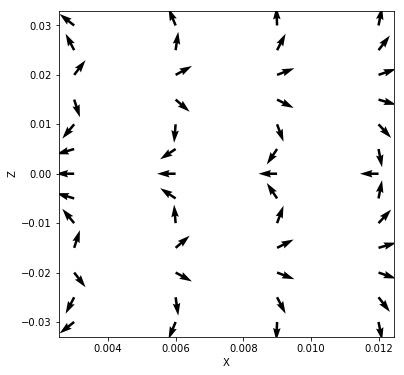

In [4]:
#Points to be plotted
x = np.arange(0.003, 0.013, 0.003)
y = np.arange(-0.03, 0.035, 0.005)
z = np.arange(-0.03, 0.035, 0.005)
X,Z = np.meshgrid(x,z)
Y = 0.0 
#X,Y,Z = np.meshgrid(x,y,z)

# MAGNET PARAMETERS, the same for all magnets
f= 0.0254 #Conversion factor from inches to meters
D = (1/2.0)*f; # Meters
t = (1/8.0)*f; # Meters
Br = 13200 # Gauss
V = volume(D,t)
m = dipMoment(Br, V) # Magnet scalar moment

#POSITION/DIRECTION PARAMETERS
# Position and direction of connector magnets

# Position of magnet 0 (r0) in meters
x0 = 0.0; y0 = 0.0; z0 = 0.018;
r0Vec = np.array([x0, y0, z0])

# Position of magnet 1 (r1) in meters
x1 = 0.0; y1 = 0.018; z1 = 0.0;
r1Vec = np.array([x1, y1, z1])

# Position of magnet 2 (r2) in meters
x2 = 0.0; y2 = 0.0; z2 = -0.018;
r2Vec = np.array([x2, y2, z2])

# Position of magnet 3 (r3) in meters
x3 = 0.0; y3 = -0.018; z3 = 0.0;
r3Vec = np.array([x3, y3, z3])

# Direction of magnets 0,1,2,3
# will be normalized
i = 1;j = 0;k = 0;
dirvec0123 = np.array([i,j,k])

# Calculate magnet 0,1,2,3 moment vector
mVec0123 = dipMomentVec2(m, dirvec0123)

# MAGNETIC FIELD
# Field of magnet 0 at grid points
Bx0,By0,Bz0 = dipfield2(mVec0123,r0Vec,X,Y,Z)

# Field of magnet 1 at grid points
Bx1,By1,Bz1 = dipfield2(mVec0123,r1Vec,X,Y,Z)

# Field of magnet 2 at grid points
Bx2,By2,Bz2 = dipfield2(mVec0123,r2Vec,X,Y,Z)

# Field of magnet 3 at grid points
Bx3,By3,Bz3 = dipfield2(mVec0123,r3Vec,X,Y,Z)

# Total magnetic field
Bxt = Bx0 + Bx1 + Bx2 +Bx3
Byt = By0 + By1 + By2 +By3
Bzt = Bz0 + Bz1 + Bz2 +Bz3

fig = plt.figure(figsize=(6, 6))
#ax = fig.gca(projection='3d')
#ax.set_xlabel('X')
#ax.set_ylabel('Y')
#ax.set_zlabel('Z')
#ax.quiver(X, Y, Z, Bxt, Byt, Bzt, length=0.001, normalize=True)
#ax.view_init(0, 30)

ax = fig.gca()
ax.set_xlabel('X')
ax.set_ylabel('Z')

#Normalize arrows
Bxtn = Bxt/((Bxt**2+Bzt**2)**0.5)
Bztn = Bzt/((Bxt**2+Bzt**2)**0.5)

ax.quiver(X,Z,Bxtn,Bztn)

plt.show()

## Two connectors in front of each other
Calculate the force of two opossing connectors directly in front of each other

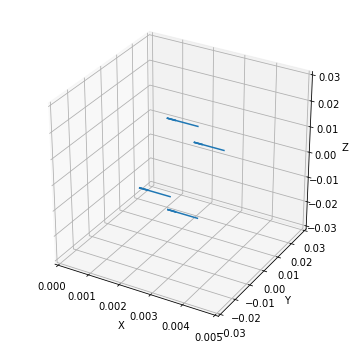

In [10]:
#Define the postions and orientations of the second connector magnets
# Position of magnet 10 (r10) in meters
x10 = 0.003; y10 = 0.0; z10 = 0.018;
r10Vec = np.array([x10, y10, z10])

# Position of magnet 11 (r11) in meters
x11 = 0.003; y11 = 0.018; z11 = 0.0;
r11Vec = np.array([x11, y11, z11])

# Position of magnet 12 (r12) in meters
x12 = 0.003; y12 = 0.0; z12 = -0.018;
r12Vec = np.array([x12, y12, z12])

# Position of magnet 13 (r13) in meters
x13 = 0.003; y13 = -0.018; z13 = 0.0;
r13Vec = np.array([x13, y13, z13])

# Direction of magnets 10,11,12,13
# will be normalized
i = 1;j = 0;k = 0;
dirvec1 = np.array([i,j,k])

#Calculate force on each magnet
fx10,fy10,fz10 = forceatpointconnector(2,x10,y10,z10,dirvec1)
fx11,fy11,fz11 = forceatpointconnector(2,x11,y11,z11,dirvec1)
fx12,fy12,fz12 = forceatpointconnector(2,x12,y12,z12,dirvec1)
fx13,fy13,fz13 = forceatpointconnector(2,x13,y13,z13,dirvec1)

#Plot forces
#Put them in a single array for quiver

xq = np.array([x10, x11, x12, x13])
yq = np.array([y10, y11, y12, y13])
zq = np.array([z10, z11, z12, z13])

fxq = np.array([fx10, fx11, fx12, fx13])
fyq = np.array([fy10, fy11, fy12, fy13])
fzq = np.array([fz10, fz11, fz12, fz13])

fig2 = plt.figure(figsize=(6, 6))
ax1 = fig2.gca(projection='3d')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_xlim(0, 0.005)
ax1.set_ylim(-0.03, 0.03)
ax1.set_zlim(-0.03, 0.03)
ax1.quiver(xq, yq, zq, fxq, fyq, fzq, length=0.001, normalize=True)

plt.show()


### Calculate total force and moment around the center of the connector

In [26]:
#Find total force
Fxt = fx10 + fx11 + fx12 + fx13
Fyt = fy10 + fy11 + fy12 + fy13
Fzt = fz10 + fz11 + fz12 + fz13
F = np.array([Fxt,Fyt,Fzt])
display("F",F)

#Calculate total moment around the center of the connector
# Find connector center
dVec = r10Vec - r12Vec
dhVec = dVec/2
cent = r12Vec+dhVec
display("center",cent)

# Find moment due to force on magnet 10
rc10Vec = r10Vec-cent
M10 = np.cross(rc10Vec,np.array([fx10,fy10,fz10]))
display("M10",M10)

# Find moment due to force on magnet 11
rc11Vec = r11Vec-cent
M11 = np.cross(rc11Vec,np.array([fx11,fy11,fz11]))
display("M11",M11)

# Find moment due to force on magnet 12
rc12Vec = r12Vec-cent
M12 = np.cross(rc12Vec,np.array([fx12,fy12,fz12]))
display("M12",M12)

# Find moment due to force on magnet 13
rc13Vec = r13Vec-cent
M13 = np.cross(rc13Vec,np.array([fx13,fy13,fz13]))
display("M13",M13)

# Find total moment at the center of the connector
M = M10 + M11 + M12 + M13
display("M",M)

'F'

array([ -2.35373723e+02,  -1.38777878e-10,  -6.93889390e-11])

'center'

array([ 0.003,  0.   ,  0.   ])

'M10'

array([ 0.        , -1.05918175,  0.        ])

'M11'

array([ 0.        , -0.        ,  1.05918175])

'M12'

array([ 0.        ,  1.05918175,  0.        ])

'M13'

array([ 0.        , -0.        , -1.05918175])

'M'

array([  0.00000000e+00,   0.00000000e+00,   1.24922295e-12])